# Sentiment Analysis of Pandit Nehru's Speech - A Tryst with Destiny

The first Prime Minister of India ,Padit Jawaharlal Nehru, on the eve of India's independence on August 15, 1947, gave this speech in the Constituent Assembly. This speech is windely regarded as one of the finest speeches rendered by a statesman in the 20th Century. 

With the 74th Independence day approaching and the threat of the Coronavirus still looming large, I felt this was a good time to revisit Pandit Nehru's inspirational speech. Being a master orator, Pandit Nehru spoke eloquently on the struggles and tribulations of the Indian population while also raising hope and for the future.

In this notebook I have tried to look at his speech from an analytical perspective. Since his speech is an inspiring one, I wondered if a sentiment analysis would also reflect the same. I have used the popular NLTK library to cary out Sentiment Analysis of Pandit Nehru's speech.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk import pos_tag
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from wordcloud import WordCloud
from PIL import Image

### Import Speech as text file

In [2]:
text = open('nehru_speech.txt').read()

### Creating a Helper Function to Clean the Text

In [3]:
def speech_cleaner(text):   
    # Lower Case conversion
    text = text.lower()
    # Tokenize sentences to words
    text = nltk.word_tokenize(text)
    # Remove empty tokens
    text = [w for w in text if len(w) > 0]
    # Remove punctuations
    punct = string.punctuation
    text = [w for w in text if w not in punct]
    # Remove stopwords
    stopword = stopwords.words('english')
    text = [w for w in text if w not in stopword] 
    # POST Tagging the text
    pos_tags = pos_tag(text)
    # Lemmatize the text
    text = [WordNetLemmatizer().lemmatize(w[0]) for w in pos_tags]
    # Removing one letter words
    text = [w for w in text if len(w) > 1]
    # Rejoin all words to get back speech
    speech = " ".join(text)
    return speech

### Creating a Helper Function for Speech semantics

In [34]:
def speech_semantics(text):
    # Lower Case conversion
    text = text.lower()
    # Tokenize the speech into sentences
    text_sentences = nltk.sent_tokenize(text)
    # Tokenize sentences to words
    text = nltk.word_tokenize(text)
    # Remove empty tokens
    text = [w for w in text if len(w) > 0]
    # Remove punctuations
    punct = string.punctuation
    text = [w for w in text if w not in punct]
    # Remove stopwords
    stopword = stopwords.words('english')
    text = [w for w in text if w not in stopword] 
    # POST Tagging the text
    pos_tags = pos_tag(text)
    # Frequency Count for words
    word_freq = FreqDist(text)
    return text_sentences, pos_tags, word_freq

### Creating a Helper Function for plotting Word Cloud 

In [30]:
def speech_wordcloud(text, max_words, title):
    wordcloud = WordCloud(
        
        background_color = 'white',
        colormap='gnuplot',
        max_font_size = 40, 
        scale = 3,
        random_state = 42,
        contour_width=2
        
    ).generate(str(text))

    fig,ax = plt.subplots(figsize = (20, 20))
    plt.axis('off')
    ax.set_title(title, fontsize = 20)
    plt.imshow(wordcloud)
    plt.show()

# Sentiment Analysis

### Exploratory Data Analysis of the Speech

In [31]:
speech = speech_cleaner(text)

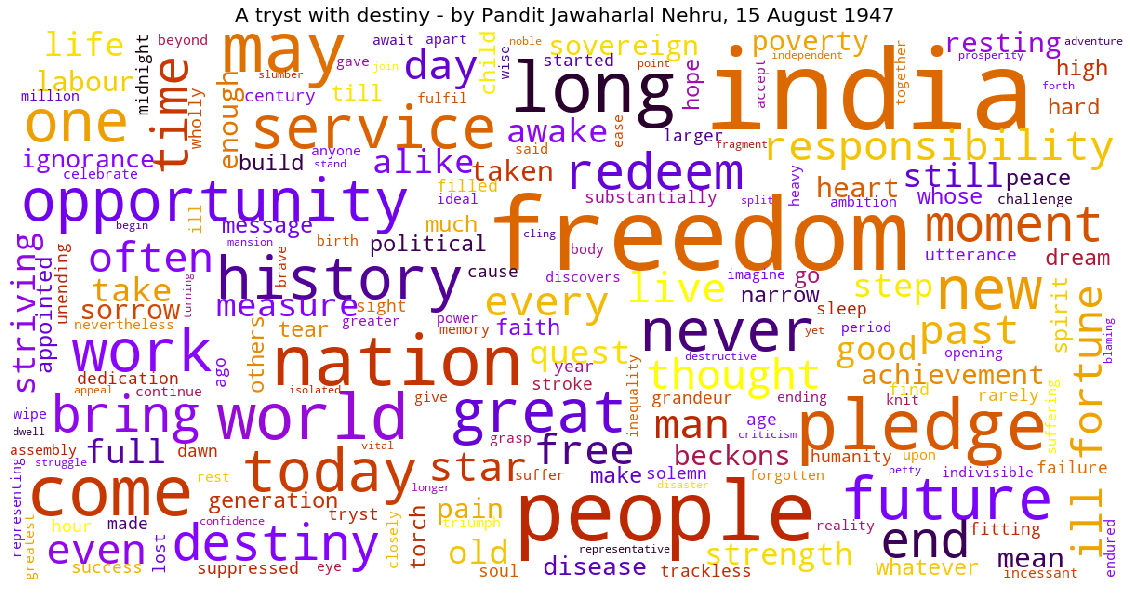

In [32]:
speech_wordcloud(speech, 100, 'A tryst with destiny - by Pandit Jawaharlal Nehru, 15 August 1947')

### Finding the most frequent words used in the Speech

In [35]:
speech_sentences, speech_pos, word_count = speech_semantics(text)

In [69]:
words_in_speech = pd.DataFrame(word_count.most_common(20), columns=['word','count'])

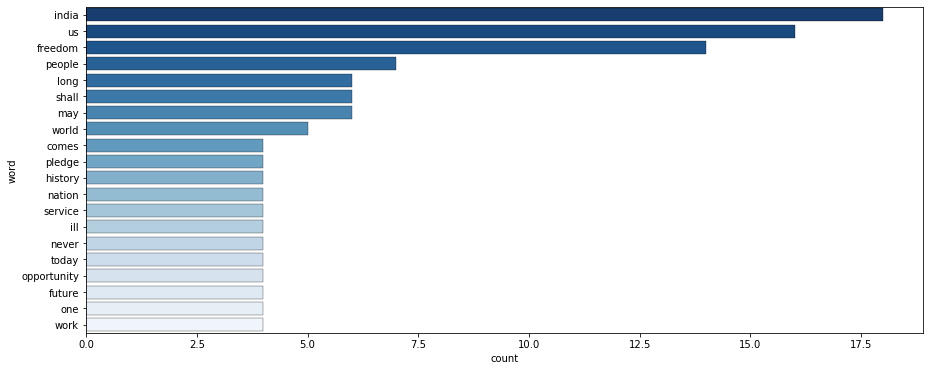

In [73]:
fig,ax = plt.subplots(figsize=[15,6])
sns.barplot(words_in_speech['count'],words_in_speech['word'],
           palette='Blues_r', edgecolor='k', linewidth='0.3')

### The lexical categories in the Speech

In [74]:
lexical_in_speech = pd.DataFrame(speech_pos, columns=['word','lexical_cat'])

In [77]:
lexical_in_speech['lexical_cat'].value_counts()*100/lexical_in_speech.shape[0]

NN     33.458647
JJ     18.233083
NNS    11.090226
RB      7.142857
VBP     5.639098
VB      4.135338
VBZ     3.007519
PRP     3.007519
VBD     2.819549
MD      2.631579
VBG     2.255639
VBN     2.067669
IN      0.939850
JJS     0.751880
CD      0.751880
JJR     0.563910
DT      0.563910
WP$     0.375940
WDT     0.375940
CC      0.187970
Name: lexical_cat, dtype: float64

In [83]:
#Noun Mask
mask1 = (lexical_in_speech['lexical_cat']=='NN')|(lexical_in_speech['lexical_cat']=='NNS')
nouns = lexical_in_speech.loc[mask1]['word'].value_counts()

#Adjective Mask
mask2 = (lexical_in_speech['lexical_cat']=='JJ')|(lexical_in_speech['lexical_cat']=='JJS')
adjective = lexical_in_speech.loc[mask2]['word'].value_counts()

#Adverb Mask
mask1 = (lexical_in_speech['lexical_cat']=='RB')
adverb = lexical_in_speech.loc[mask1]['word'].value_counts()

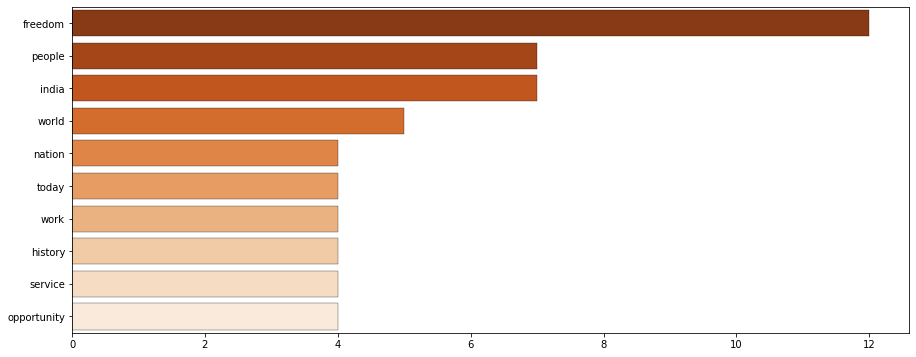

In [88]:
fig,ax = plt.subplots(figsize=[15,6])
plot = nouns[nouns>3]
sns.barplot(plot.values, plot.index,
           palette='Oranges_r', edgecolor='k', linewidth='0.3')

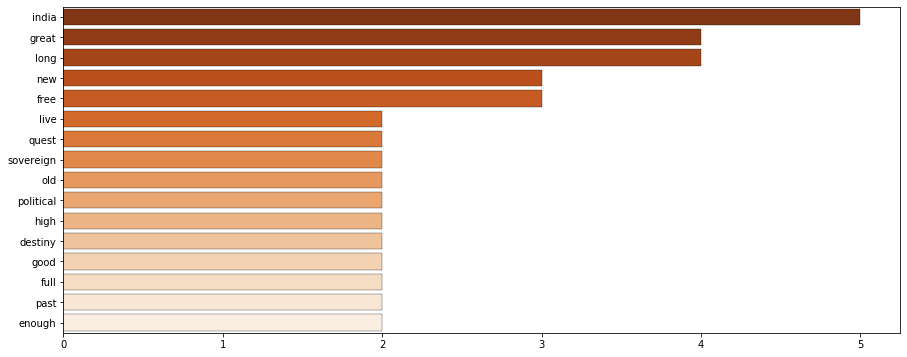

In [90]:
fig,ax = plt.subplots(figsize=[15,6])
plot = adjective[adjective>1]
sns.barplot(plot.values, plot.index,
           palette='Oranges_r', edgecolor='k', linewidth='0.3')

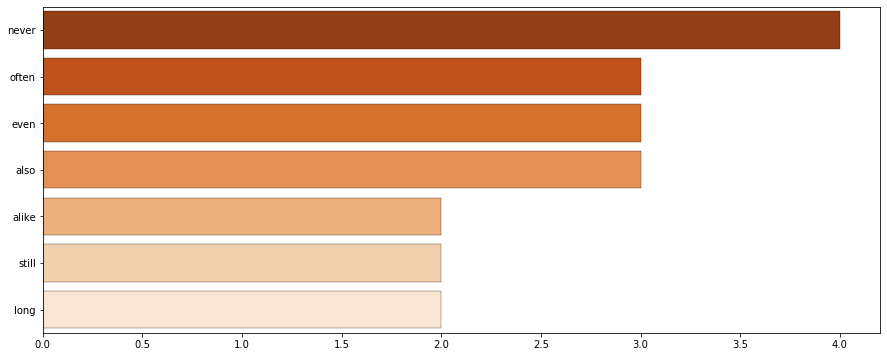

In [91]:
fig,ax = plt.subplots(figsize=[15,6])
plot = adverb[adverb>1]
sns.barplot(plot.values, plot.index,
           palette='Oranges_r', edgecolor='k', linewidth='0.3')

### Sentiment in the Speech

In [92]:
sid = SentimentIntensityAnalyzer()

In [94]:
sentence_df = pd.DataFrame({'sentence':speech_sentences})
sentence_df['negative_score'] = sentence_df['sentence'].apply(lambda x:sid.polarity_scores(x)['neg'])
sentence_df['neutral_score'] = sentence_df['sentence'].apply(lambda x:sid.polarity_scores(x)['neu'])
sentence_df['positive_score'] = sentence_df['sentence'].apply(lambda x:sid.polarity_scores(x)['pos'])
sentence_df['compound_score'] = sentence_df['sentence'].apply(lambda x:sid.polarity_scores(x)['compound'])

In [95]:
sentence_df

,sentence,negative_score,neutral_score,positive_score,compound_score
0,"long years ago we made a tryst with destiny, a...",0.000,1.000,0.000,0.0000
1,"at the stroke of the midnight hour, when the w...",0.000,0.802,0.198,0.6369
2,"a moment comes, which comes but rarely in hist...",0.000,1.000,0.000,0.0000
3,it is fitting that at this solemn moment we ta...,0.045,0.955,0.000,-0.0964
4,at the dawn of history india started on her un...,0.083,0.720,0.197,0.6249
5,through good and ill fortune alike she has nev...,0.154,0.524,0.323,0.6324
6,we end today a period of ill fortune and india...,0.203,0.797,0.000,-0.4215
7,the achievement we celebrate today is but a st...,0.000,0.518,0.482,0.9313
8,are we brave enough and wise enough to grasp t...,0.000,0.488,0.512,0.9127
9,freedom and power bring responsibility.,0.000,0.488,0.512,0.6369


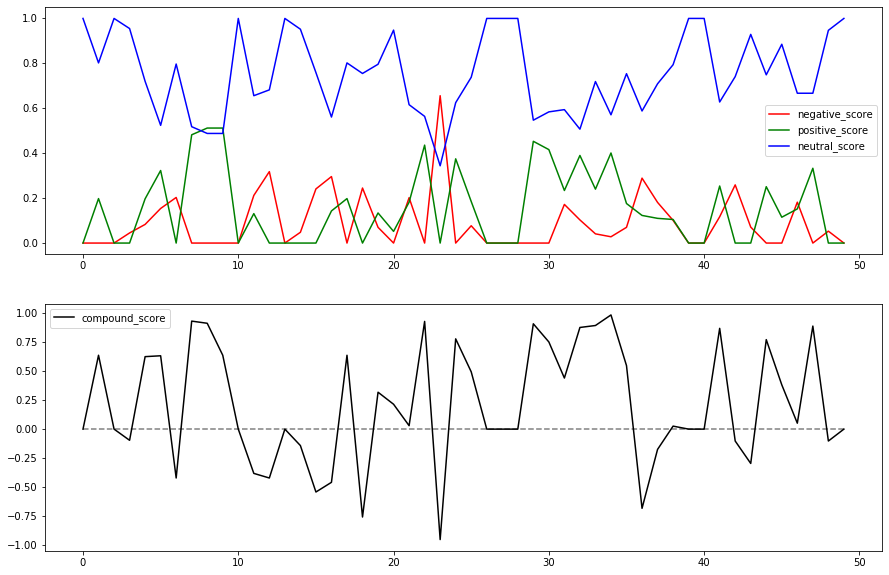

In [101]:
fig,ax = plt.subplots(2,1,figsize=[15,10])
sentiment = ['negative_score','positive_score','neutral_score']
colors = ['r','g','b']
for s, c in zip(sentiment, colors):
    ax[0].plot(sentence_df[s], color=c, label=s)
    ax[0].legend()
    
ax[1].plot(sentence_df['compound_score'], color='k', label='compound_score')
ax[1].hlines(0,sentence_df.index.min(), sentence_df.index.max(), color='k',linestyle='--',alpha=0.5)
ax[1].legend()

In [102]:
sentence_df['compound_score'].sum()/len(sentence_df)

0.21261999999999998